In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

import warnings 
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_csv('SalaryData_Train(1).csv')
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
test_data=pd.read_csv('SalaryData_Test(1).csv')
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
train_data.shape

(30161, 14)

In [5]:
test_data.shape

(15060, 14)

In [6]:
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [10]:
train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [11]:
test_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [12]:
train_data.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


In [13]:
test_data.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


### Data Transformation:

In [14]:
#Converting Object Datatypes into Integer.
le =LabelEncoder()
train_data['workclass']=le.fit_transform(train_data['workclass'])
train_data['education']=le.fit_transform(train_data['education'])
train_data['maritalstatus']=le.fit_transform(train_data['maritalstatus'])
train_data['occupation']=le.fit_transform(train_data['occupation'])
train_data['relationship']=le.fit_transform(train_data['relationship'])
train_data['race']=le.fit_transform(train_data['race'])
train_data['sex']=le.fit_transform(train_data['sex'])
train_data['native']=le.fit_transform(train_data['native'])
train_data['Salary']=le.fit_transform(train_data['Salary'])
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [15]:
#Converting Object Datatypes into Integer.

test_data["workclass"] = le.fit_transform(test_data["workclass"])
test_data["education"] = le.fit_transform(test_data["education"])
test_data["maritalstatus"] = le.fit_transform(test_data["maritalstatus"])
test_data["occupation"] = le.fit_transform(test_data["occupation"])
test_data["relationship"] = le.fit_transform(test_data["relationship"])
test_data["race"] = le.fit_transform(test_data["race"])
test_data["sex"] = le.fit_transform(test_data["sex"])
test_data["native"] = le.fit_transform(test_data["native"])
test_data["Salary"] = le.fit_transform(test_data["Salary"])
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


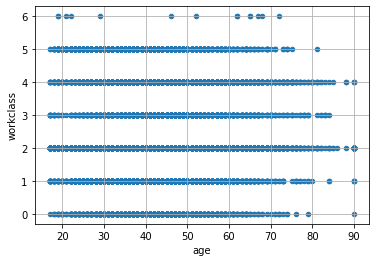

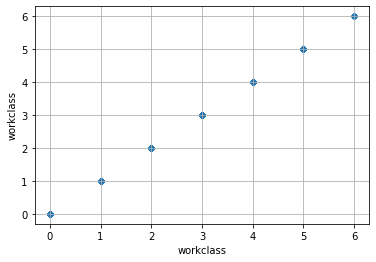

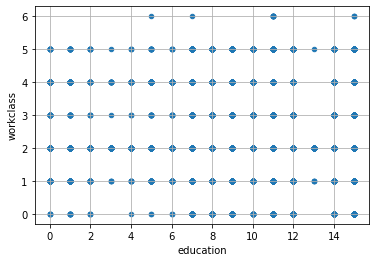

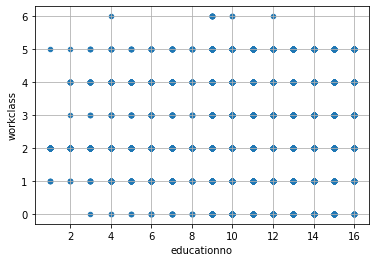

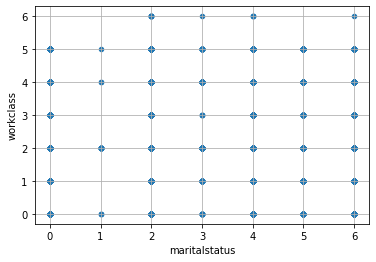

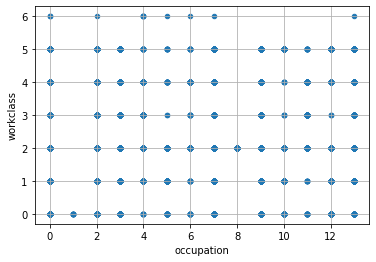

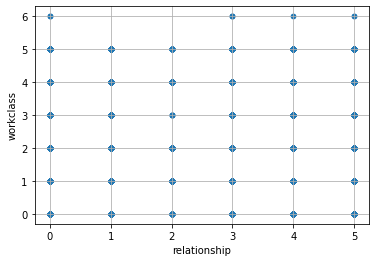

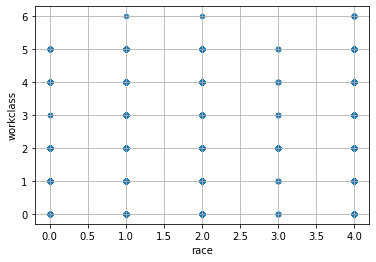

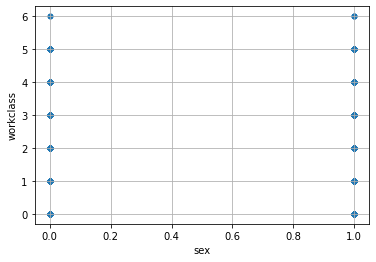

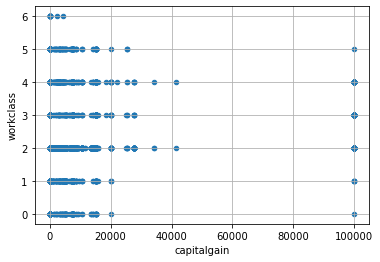

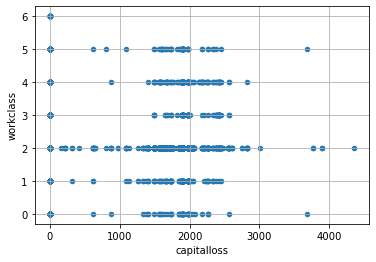

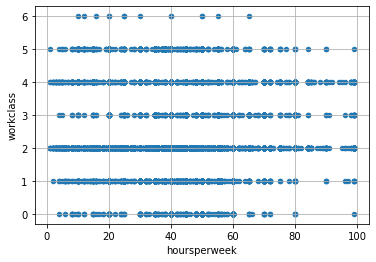

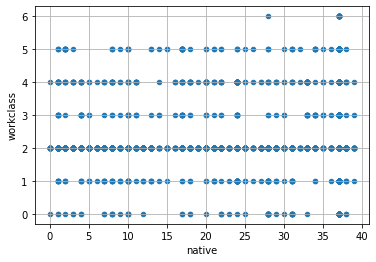

In [16]:
for i in train_data.describe().columns[:-1]:
    train_data.plot.scatter(i,'workclass',grid=True)

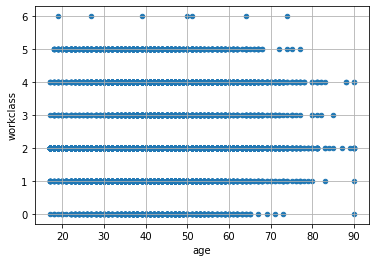

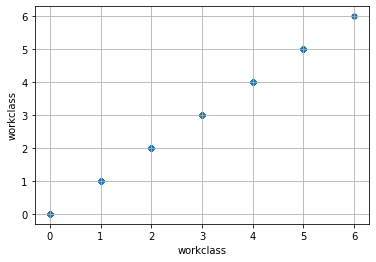

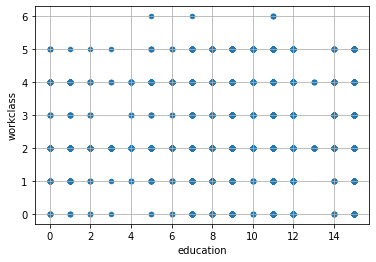

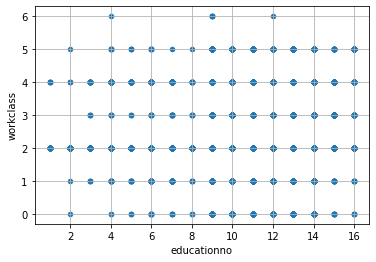

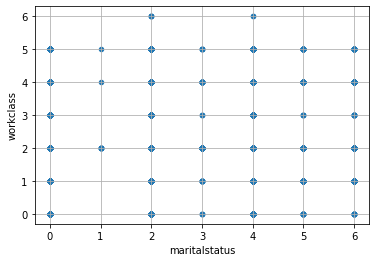

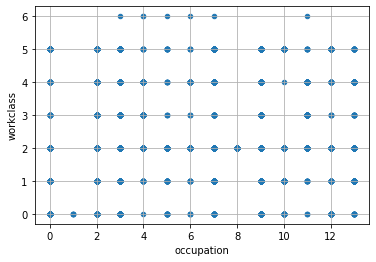

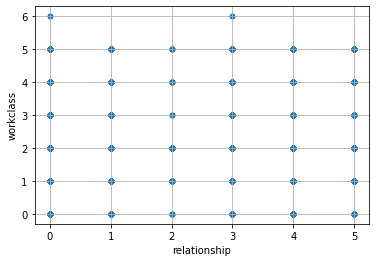

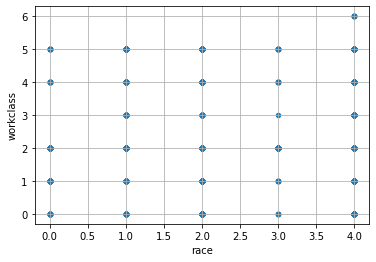

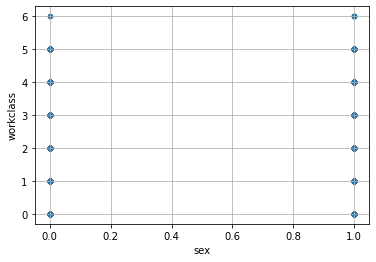

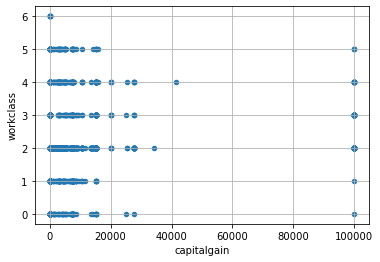

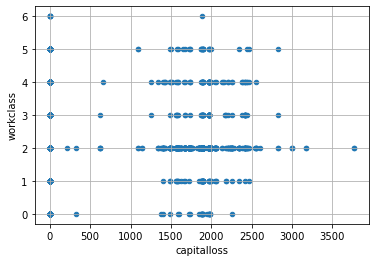

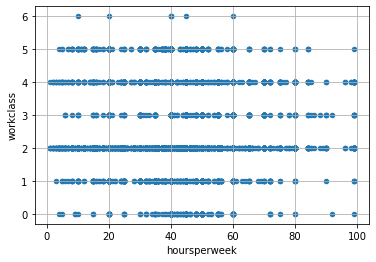

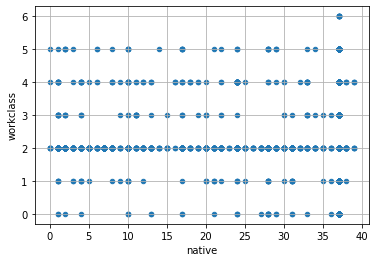

In [17]:
for i in test_data.describe().columns[:-1]:
    test_data.plot.scatter(i,'workclass',grid=True)

In [18]:
#Normalizing Train Data:
minmax=MinMaxScaler()
minmax_data=minmax.fit_transform(train_data.iloc[:,:13])
minmax_data= pd.DataFrame(data=minmax_data,columns=train_data.columns[:-1])
minmax_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.397959,0.948718
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.122449,0.948718
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.397959,0.948718
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.397959,0.948718
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.397959,0.102564
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0.136986,0.333333,0.466667,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.377551,0.948718
30157,0.315068,0.333333,0.733333,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.000000,0.0,0.397959,0.948718
30158,0.561644,0.333333,0.733333,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.397959,0.948718
30159,0.068493,0.333333,0.733333,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.193878,0.948718


In [19]:
train_y_df =train_data.iloc[:,13]
train_y_df

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

<AxesSubplot:xlabel='Salary', ylabel='count'>

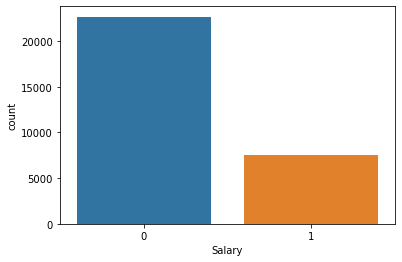

In [50]:
sns.countplot(train_y_df)

In [21]:
train_data_df = pd.concat([minmax_data,train_y_df],axis=1)
train_data_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.021740,0.0,0.397959,0.948718,0
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.000000,0.0,0.122449,0.948718,0
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.000000,0.0,0.397959,0.948718,0
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.000000,0.0,0.397959,0.948718,0
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.000000,0.0,0.397959,0.102564,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,0.136986,0.333333,0.466667,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.000000,0.0,0.377551,0.948718,0
30157,0.315068,0.333333,0.733333,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.000000,0.0,0.397959,0.948718,1
30158,0.561644,0.333333,0.733333,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.000000,0.0,0.397959,0.948718,0
30159,0.068493,0.333333,0.733333,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.000000,0.0,0.193878,0.948718,0


In [22]:
#Normalizing Test data:
minmax_data2=minmax.fit_transform(test_data.iloc[:,:13])
minmax_data2= pd.DataFrame(data=minmax_data2,columns=test_data.columns[:-1])
minmax_data2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.109589,0.333333,0.066667,0.400000,0.666667,0.461538,0.6,0.50,1.0,0.000000,0.0,0.397959,0.948718
1,0.287671,0.333333,0.733333,0.533333,0.333333,0.307692,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718
2,0.150685,0.166667,0.466667,0.733333,0.333333,0.769231,0.0,1.00,1.0,0.000000,0.0,0.397959,0.948718
3,0.369863,0.333333,1.000000,0.600000,0.333333,0.461538,0.0,0.50,1.0,0.076881,0.0,0.397959,0.948718
4,0.232877,0.333333,0.000000,0.333333,0.666667,0.538462,0.2,1.00,1.0,0.000000,0.0,0.295918,0.948718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.219178,0.333333,0.600000,0.800000,0.666667,0.692308,0.6,1.00,1.0,0.000000,0.0,0.397959,0.948718
15056,0.301370,0.333333,0.600000,0.800000,0.000000,0.692308,0.2,1.00,0.0,0.000000,0.0,0.357143,0.948718
15057,0.287671,0.333333,0.600000,0.800000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718
15058,0.369863,0.333333,0.600000,0.800000,0.000000,0.000000,0.6,0.25,1.0,0.054551,0.0,0.397959,0.948718


In [23]:
test_y_df=test_data.iloc[:,13]
test_y_df

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int32

<AxesSubplot:xlabel='Salary', ylabel='count'>

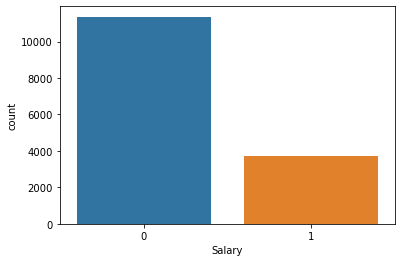

In [51]:
sns.countplot(test_y_df)

In [25]:
test_data_df = pd.concat([minmax_data2,test_y_df],axis=1)
test_data_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.109589,0.333333,0.066667,0.400000,0.666667,0.461538,0.6,0.50,1.0,0.000000,0.0,0.397959,0.948718,0
1,0.287671,0.333333,0.733333,0.533333,0.333333,0.307692,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718,0
2,0.150685,0.166667,0.466667,0.733333,0.333333,0.769231,0.0,1.00,1.0,0.000000,0.0,0.397959,0.948718,1
3,0.369863,0.333333,1.000000,0.600000,0.333333,0.461538,0.0,0.50,1.0,0.076881,0.0,0.397959,0.948718,1
4,0.232877,0.333333,0.000000,0.333333,0.666667,0.538462,0.2,1.00,1.0,0.000000,0.0,0.295918,0.948718,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.219178,0.333333,0.600000,0.800000,0.666667,0.692308,0.6,1.00,1.0,0.000000,0.0,0.397959,0.948718,0
15056,0.301370,0.333333,0.600000,0.800000,0.000000,0.692308,0.2,1.00,0.0,0.000000,0.0,0.357143,0.948718,0
15057,0.287671,0.333333,0.600000,0.800000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.0,0.500000,0.948718,0
15058,0.369863,0.333333,0.600000,0.800000,0.000000,0.000000,0.6,0.25,1.0,0.054551,0.0,0.397959,0.948718,0


## Model Building:



In [26]:
X_train = train_data_df.iloc[:3000,:13]
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.02174,0.0,0.397959,0.948718
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.122449,0.948718
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.00000,0.0,0.397959,0.948718
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.00000,0.0,0.397959,0.948718
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.00000,0.0,0.397959,0.102564
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.191781,0.333333,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.602041,0.948718
2996,0.178082,0.333333,0.600000,0.800000,0.333333,0.923077,0.0,1.0,1.0,0.00000,0.0,0.397959,0.948718
2997,0.273973,0.333333,0.733333,0.533333,0.333333,0.692308,0.0,1.0,1.0,0.00000,0.0,0.397959,0.948718
2998,0.178082,0.333333,0.600000,0.800000,0.666667,0.692308,0.2,0.5,1.0,0.00000,0.0,0.500000,0.948718


In [27]:
y_train = train_data_df.iloc[:3000,13]
y_train

0       0
1       0
2       0
3       0
4       0
       ..
2995    1
2996    0
2997    1
2998    1
2999    0
Name: Salary, Length: 3000, dtype: int32

In [28]:
X_test = test_data_df.iloc[:1500,:13]
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.109589,0.333333,0.066667,0.400000,0.666667,0.461538,0.6,0.50,1.0,0.000000,0.000000,0.397959,0.948718
1,0.287671,0.333333,0.733333,0.533333,0.333333,0.307692,0.0,1.00,1.0,0.000000,0.000000,0.500000,0.948718
2,0.150685,0.166667,0.466667,0.733333,0.333333,0.769231,0.0,1.00,1.0,0.000000,0.000000,0.397959,0.948718
3,0.369863,0.333333,1.000000,0.600000,0.333333,0.461538,0.0,0.50,1.0,0.076881,0.000000,0.397959,0.948718
4,0.232877,0.333333,0.000000,0.333333,0.666667,0.538462,0.2,1.00,1.0,0.000000,0.000000,0.295918,0.948718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.095890,0.333333,1.000000,0.600000,0.666667,0.846154,0.4,0.25,1.0,0.000000,0.000000,0.193878,0.435897
1496,0.520548,0.500000,1.000000,0.600000,0.333333,0.230769,0.0,1.00,1.0,0.000000,0.524403,0.448980,0.948718
1497,0.602740,0.666667,0.733333,0.533333,0.333333,0.153846,0.0,1.00,1.0,0.000000,0.000000,0.346939,0.948718
1498,0.410959,0.166667,0.600000,0.800000,0.333333,0.692308,0.0,1.00,1.0,0.000000,0.000000,0.500000,0.948718


In [29]:
y_test = test_data_df.iloc[:1500,13]
y_test

0       0
1       0
2       1
3       1
4       0
       ..
1495    0
1496    1
1497    0
1498    1
1499    0
Name: Salary, Length: 1500, dtype: int32

In [30]:
X_train.shape,y_train.shape       #Train Data

((3000, 13), (3000,))

In [31]:
X_test.shape,y_test.shape         #Test Data

((1500, 13), (1500,))

## Model Training:

In [32]:
svm_model =SVC()
svm_model.fit(X_train,y_train)

SVC()

In [33]:
y_pred1=svm_model.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 1, 0])

In [34]:
pd.Series(y_pred1).value_counts()

0    1235
1     265
dtype: int64

In [35]:
pd.crosstab(y_test,y_pred1,margins=True)

col_0,0,1,All
Salary,,,
0,1038,83,1121
1,197,182,379
All,1235,265,1500


In [36]:
accuracy_score(y_test,y_pred1)      #Accuracy =81%

0.8133333333333334

In [37]:
confusion_matrix(y_test,y_pred1)

array([[1038,   83],
       [ 197,  182]], dtype=int64)

In [38]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1121
           1       0.69      0.48      0.57       379

    accuracy                           0.81      1500
   macro avg       0.76      0.70      0.72      1500
weighted avg       0.80      0.81      0.80      1500



## Improving Model using Grid Search CV:

In [39]:
param_grid = {'C' : [0.1, 1, 10, 100, 1000],
              'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel' : ['rbf']}

In [40]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,  cv = 5)

In [41]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.780 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.803 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.785 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.803 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.817 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.742 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.742 total time=   0.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.742 total time=   0.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.742 total time=   0.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.740 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.742 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.787 total time=   0.8s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.768 total time=   0.9s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.800 total time=   0.8s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.808 total time=   0.9s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.822 total time=   0.5s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.833 total time=   0.5s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.805 total time=   0.5s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.830 total time=   0.5s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.815 total time=   0.4s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.822 total time=   0.3s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.827 total time=   0.3s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.803 total time=   0.3s
[CV 4/5] END ....C=1000, gam

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [42]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [43]:
grid.best_estimator_

SVC(C=100, gamma=0.1)

In [44]:
grid_pred = grid.predict(X_test)
grid_pred

array([0, 0, 0, ..., 0, 1, 0])

In [45]:
pd.Series(grid_pred).value_counts()

0    1178
1     322
dtype: int64

In [46]:
pd.crosstab(y_test,grid_pred,margins=True)

col_0,0,1,All
Salary,,,
0,1017,104,1121
1,161,218,379
All,1178,322,1500


In [47]:
accuracy_score(y_test,grid_pred)        #Accuracy=82%

0.8233333333333334

In [48]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1121
           1       0.68      0.58      0.62       379

    accuracy                           0.82      1500
   macro avg       0.77      0.74      0.75      1500
weighted avg       0.82      0.82      0.82      1500



In [49]:
confusion_matrix(y_test,grid_pred)

array([[1017,  104],
       [ 161,  218]], dtype=int64)

#### Inference
#### So, by using grid search, we have improved our model accuracy.